In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Histogram
Histrograms is a graph that represents Pixel intensities in one Axis and the frequency in y axis.

0
255
(733, 1100, 3)
(733, 1100)


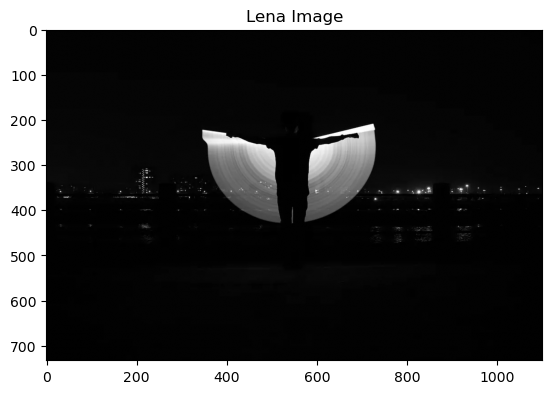

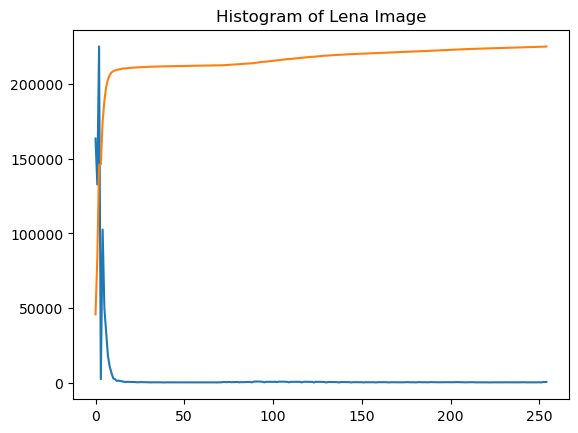

In [4]:
# Sample Histogram
bgr_img = cv2.imread("images/dark_image.png", cv2.IMREAD_COLOR_BGR)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
print(gray_img.min())
print(gray_img.max())
print(bgr_img.shape)
print(gray_img.shape)
# Calculate the histogram and cummulative distribution
gray_img_histogram = cv2.calcHist([gray_img], [0], None, [255], [0,256])
gray_img_cdf = gray_img_histogram.cumsum()
gray_img_cdf_norm = gray_img_cdf / gray_img_cdf.max()

plt.imshow(gray_img, cmap = "gray")
plt.title("Lena Image")
plt.show()
plt.plot(gray_img_histogram)
plt.plot(gray_img_cdf_norm * gray_img_histogram.max())
plt.title("Histogram of Lena Image")
plt.show()

## Histogram Equalisation
Histogram equalization is a technique to redistribute pixel intensity values so that the histogram becomes more spread out (closer to flat). This enhances contrast: dark regions become brighter, and bright regions may get slightly darker, making details more visible.\
### Procedure
1. Compute the Cumulative Distribution Function (CDF) of the histogram, and identify the smallest non-zero CDF value.
2. Map each intensity value to a new one using the formula:\
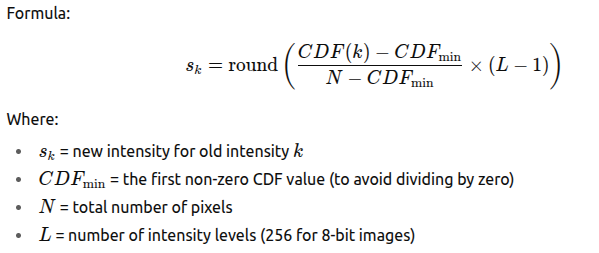\

Explanation of the Equation
- CDF(k) - Fraction of pixels with intensity values from 0 up to k.
- Subtracting CDF(min) - CDF(min): Ensures that the smallest intensity maps to 0.\
Example: If the first non-zero CDF occurs at pixel value 50 with CDF = 0.04N, then subtracting it gives 0.04N−0.04N=0. Thus pixel value 50 maps to 0.
- Dividing by N−CDF(min): Keeps the mapping normalized within [0,1]. Since we subtracted CDF(min) in the numerator, the maximum would otherwise never reach 1. Subtracting it in the denominator fixes this, so the brightest pixel maps to 1.
- Multiplying by (L–1): Expands the normalized values to the full intensity range (e.g., 0–255 for 8-bit images).
- Rounding: Ensures pixel intensities remain integers.

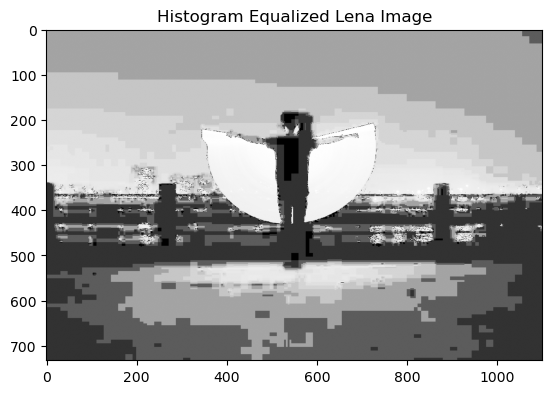

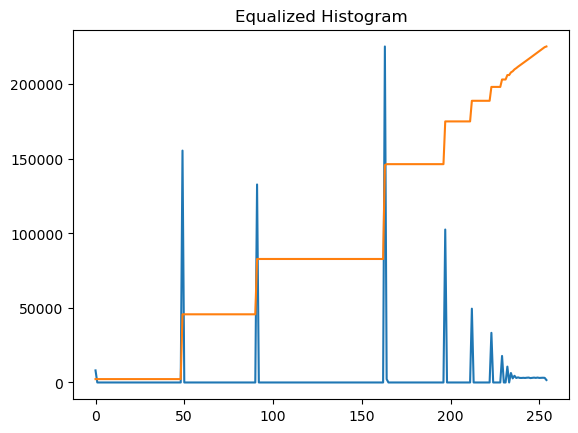

In [5]:
gray_img_equalized = cv2.equalizeHist(gray_img)
gray_img_equalized_histogram = cv2.calcHist([gray_img_equalized], [0], None, [255], [0, 256])
gray_img_equalized_cdf = gray_img_equalized_histogram.cumsum()
gray_img_equalized_cdf_norm = gray_img_equalized_cdf / gray_img_equalized_cdf.max()

plt.imshow(gray_img_equalized, cmap = "gray")
plt.title("Histogram Equalized Lena Image")
plt.show()
plt.plot(gray_img_equalized_histogram)
plt.plot(gray_img_equalized_cdf_norm * gray_img_equalized_histogram.max())
plt.title("Equalized Histogram")
plt.show()


## CLAHE (Contrast Limited Adaptive Histogram Equalisation)
Histogram Equalisation will fail in uneven lighting conditions. CLAHE will do an adaptive equalisation by separating the image into blocks.\
### Procedure
1. Separate the image into blocks.
2. Calculate the histogram for each block.
3. Set a clip limit for number of pixels in each bin. If any of the bins has number of pixels greater than the clip then re distribute the remaining pixels to other bins.
4. Perform Histogram Equalisation to all the tiles.
5. Final image is obtained by interpolating the equalised tiles.

### Parameters and Explanation
1. Clip Limit -\
**Higher clip limit**: preserves the tall peaks within each block. When the blocks are merged through interpolation, these preserved peaks reinforce each other, making the overall peak even taller.\
**Lower clip limit**: the tall peaks are clipped and redistributed, so during interpolation they spread out further, and the overall peak becomes less pronounced.
2. Block size -\
**Small block size**: Each tile has its own histogram, so local peaks are equalized independently. This makes local details (textures, small variations) more visible. In the overall image, many tiny patches get their contrast boosted, so fine features “pop out” more — but risk of noise or patchiness increases.\
**Large block size**: The histogram in each block starts to look like the global histogram. Small local variations get averaged out (overshadowed by the total pixel count), so they don’t get boosted. Instead, the overall dynamic range of the image is stretched — global contrast increases, but local detail enhancement is weaker.

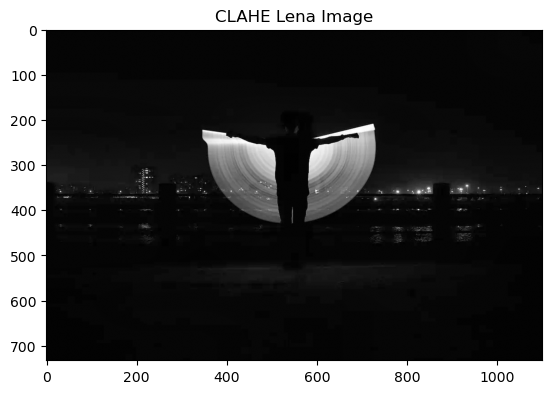

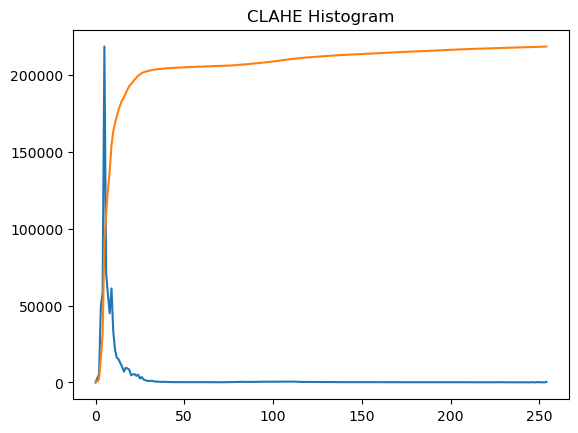

In [6]:
# Increase the clipLimit to see noise in the image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_gray_img = clahe.apply(gray_img)

clahe_gray_img_histogram = cv2.calcHist([clahe_gray_img], [0], None, [255], [0,256])
clahe_gray_img_histogram_cdf = clahe_gray_img_histogram.cumsum()
clahe_gray_img_histogram_cdf_norm = clahe_gray_img_histogram_cdf / clahe_gray_img_histogram_cdf.max()

plt.imshow(clahe_gray_img, cmap = "gray")
plt.title("CLAHE Lena Image")
plt.show()
plt.plot(clahe_gray_img_histogram)
plt.plot(clahe_gray_img_histogram_cdf_norm * clahe_gray_img_histogram.max())
plt.title("CLAHE Histogram")
plt.show()

## Comparision
Global Histogram Equalization: blindly stretches the histogram → works if the image already has a wide distribution, but fails if the image has uneven lighting or only two peaks (like yours).\
CLAHE: smarter, because it adapts per block and uses clipping → avoids noise amplification and produces a more visually pleasing result.

Text(0.5, 1.0, 'CLAHE Histogram')

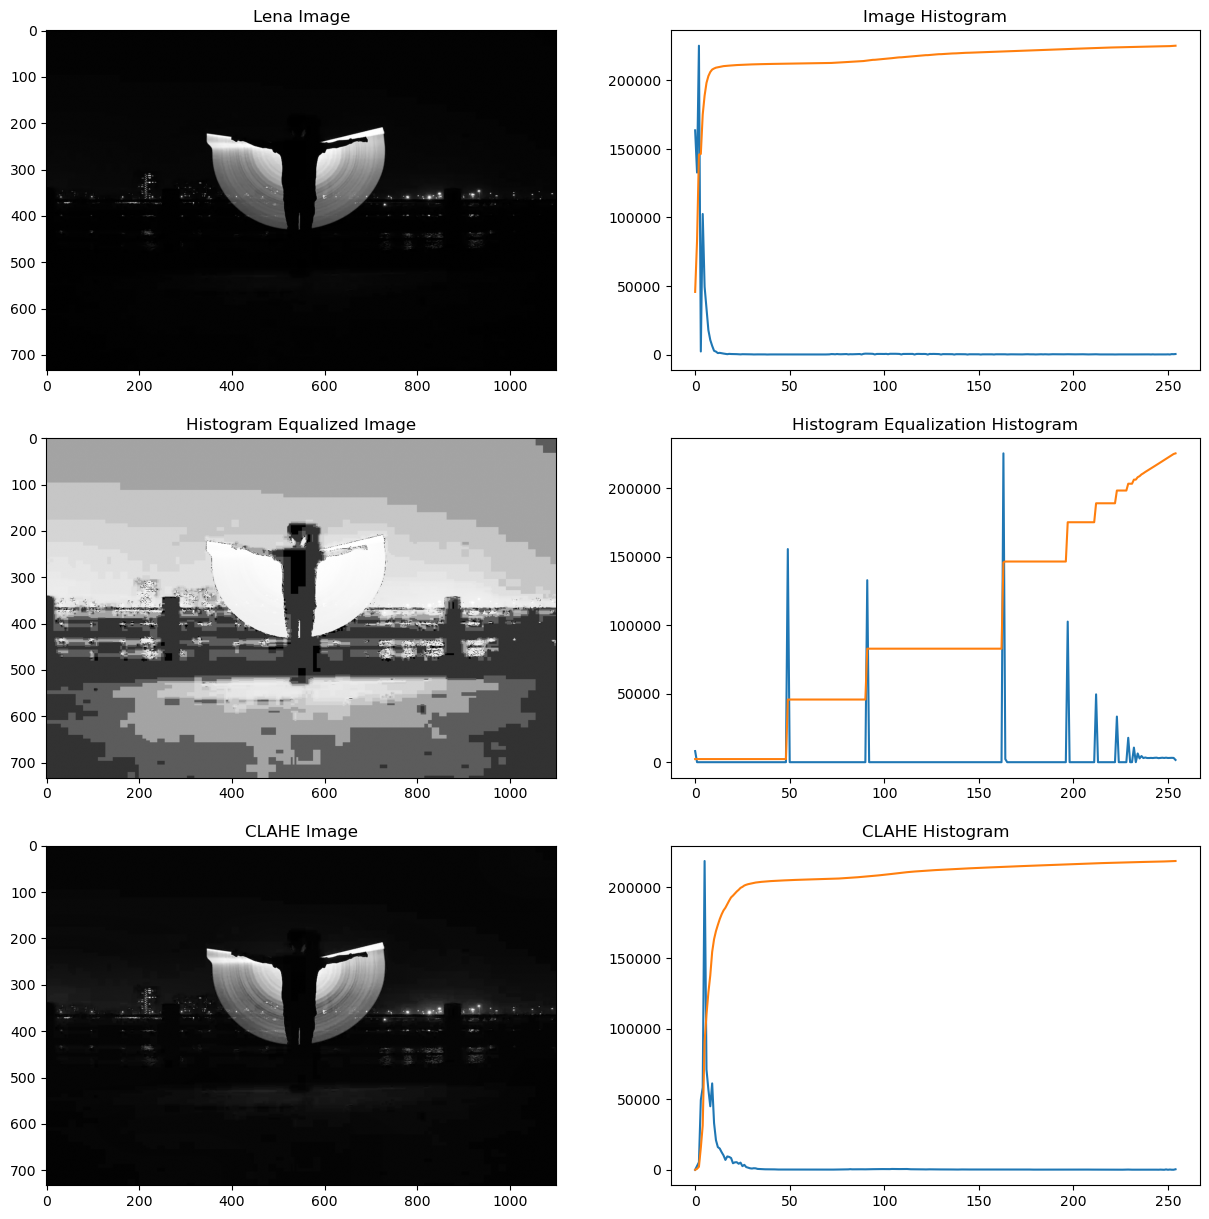

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.imshow(gray_img, cmap ="gray")
plt.title("Lena Image")
plt.subplot(3,2,2)
plt.plot(gray_img_histogram)
plt.plot(gray_img_cdf_norm * gray_img_histogram.max())
plt.title("Image Histogram")

plt.subplot(3,2,3)
plt.imshow(gray_img_equalized, cmap ="gray")
plt.title("Histogram Equalized Image")
plt.subplot(3,2,4)
plt.plot(gray_img_equalized_histogram)
plt.plot(gray_img_equalized_cdf_norm * gray_img_equalized_histogram.max())
plt.title("Histogram Equalization Histogram")

plt.subplot(3,2,5)
plt.imshow(clahe_gray_img, cmap ="gray")
plt.title("CLAHE Image")
plt.subplot(3,2,6)
plt.plot(clahe_gray_img_histogram)
plt.plot(clahe_gray_img_histogram_cdf_norm * clahe_gray_img_histogram.max())
plt.title("CLAHE Histogram")